In [3]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
Enb = pd.read_excel("D:/pyproj/datasource/data/ENB2012_data.xlsx")
print(Enb.sample(10))

       X1     X2     X3     X4   X5  X6    X7  X8     Y1     Y2
217  0.74  686.0  245.0  220.5  3.5   3  0.10   4  10.15  13.36
305  0.79  637.0  343.0  147.0  7.0   3  0.25   1  40.03  37.81
103  0.90  563.5  318.5  122.5  7.0   5  0.10   2  27.90  34.20
377  0.64  784.0  343.0  220.5  3.5   3  0.25   2  16.84  20.56
205  0.82  612.5  318.5  147.0  7.0   3  0.10   4  22.80  28.61
540  0.82  612.5  318.5  147.0  7.0   2  0.40   1  29.22  31.71
379  0.64  784.0  343.0  220.5  3.5   5  0.25   2  17.11  20.43
680  0.86  588.0  294.0  147.0  7.0   2  0.40   4  32.38  31.53
537  0.86  588.0  294.0  147.0  7.0   3  0.40   1  32.39  30.66
65   0.79  637.0  343.0  147.0  7.0   3  0.10   1  37.12  35.28


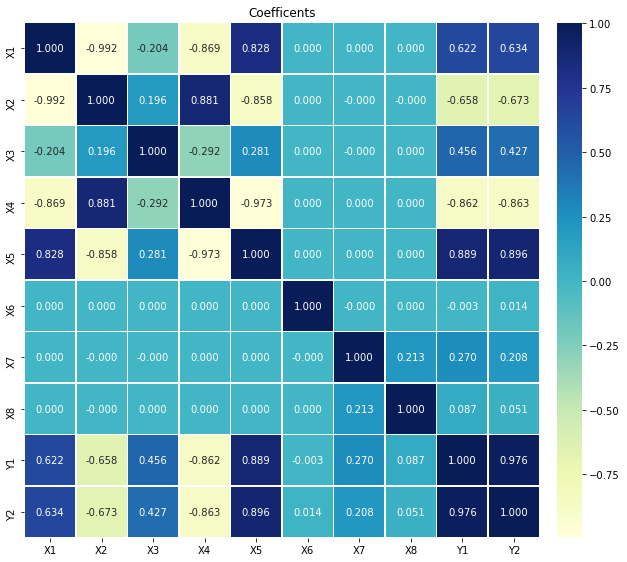

In [5]:
datacor = np.corrcoef(Enb,rowvar=0)
datacor = pd.DataFrame(data = datacor,columns=Enb.columns,index=Enb.columns)
plt.figure(figsize=(10,10))
ax = sns.heatmap(datacor,square=True,annot=True,fmt=".3f",linewidths=.5,cmap="YlGnBu",cbar_kws={"fraction":0.046,"pad":0.03})
ax.set_title("Coefficents")
plt.show()

In [6]:
formula = "Y1~X1+X2+X3+X4+X5+X6+X7+X8"
lm = smf.ols(formula,Enb).fit()

In [7]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:36:02   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.0134     19.034      4.414      0.0

In [8]:
from itertools import combinations

In [9]:
variable = []
aic = []
bic = []
Cond = []
R_squared = []

In [10]:
for index in range(1,len(Enb.columns.values[0:-2])):
    var = list(combinations(Enb.columns.values[0:-2],index))
    for v in var:
        formulav = "Y1"+"~"+"+".join(v)
        lm = smf.ols(formulav,Enb).fit()
        bic.append(lm.bic)
        aic.append(lm.aic)
        variable.append(v)
        Cond.append(lm.condition_number)
        R_squared.append(lm.rsquared)

In [11]:
df = pd.DataFrame()
df["variables"] = variable
df["aic"] = aic
df["bic"] = bic
df["Cond"] = Cond
df["R_squared"] = R_squared
df.sort_values("bic",ascending=True).head(10)


,variables,aic,bic,Cond,R_squared
194,"(X1, X4, X5, X7, X8)",3841.303792,3869.166530,7.622924e+03,0.915722
118,"(X1, X4, X5, X7)",3847.791626,3871.010575,7.617974e+03,0.914785
235,"(X1, X3, X4, X5, X7, X8)",3838.974828,3871.481357,7.463448e+04,0.916195
226,"(X1, X2, X3, X5, X7, X8)",3838.974828,3871.481357,1.525005e+05,0.916195
248,"(X1, X2, X3, X4, X5, X7, X8)",3838.974828,3871.481357,2.838048e+16,0.916195
230,"(X1, X2, X4, X5, X7, X8)",3838.974828,3871.481357,1.428812e+05,0.916195
183,"(X1, X3, X4, X5, X7)",3845.510375,3873.373114,7.463078e+04,0.915259
167,"(X1, X2, X3, X5, X7)",3845.510375,3873.373114,1.524963e+05,0.915259
173,"(X1, X2, X4, X5, X7)",3845.510375,3873.373114,1.428772e+05,0.915259
219,"(X1, X2, X3, X4, X5, X7)",3845.510375,3873.373114,2.831853e+16,0.915259


In [12]:
formula = "Y1~X1+X4+X5+X7+X8"
lm = smf.ols(formula,Enb).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1656.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:36:03   Log-Likelihood:                -1914.7
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     762   BIC:                             3869.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.4486      4.186     10.859      0.0

In [13]:
Y_pre = lm.predict(Enb)
metrics.mean_absolute_error(Y_pre,Enb.Y1)

2.0853894644526876

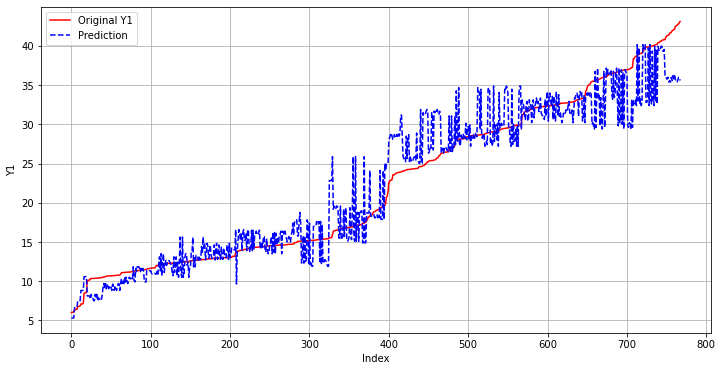

In [14]:
Y_pre = lm.predict(Enb)
index = np.argsort(Enb.Y1)
plt.figure(figsize=(12,6))
plt.plot(np.arange(Enb.shape[0]),Enb.Y1[index],"r",label= "Original Y1")
plt.plot(np.arange(Enb.shape[0]),Y_pre[index],"b--",label="Prediction")
plt.legend()
plt.grid("on")
plt.xlabel("Index")
plt.ylabel("Y1")
plt.show()

In [15]:
diabete = pd.read_csv("D:/pyproj/datasource/data/diabetes.csv",sep="\t")
print(diabete.sample(20))

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
123   50    2  29.6   94.33  300  242.4  33.0  9.09  4.8122  109   84
229   41    2  24.9   86.00  192  115.0  61.0  3.00  4.3820   94   53
114   55    1  36.6  113.00  199   94.4  43.0  4.63  5.7301   97  258
51    65    2  27.9  103.00  159   96.8  42.0  4.00  4.6151   86  225
403   43    1  35.4   93.00  185  100.2  44.0  4.00  5.3181  101  275
205   40    1  30.7   99.00  177   85.4  50.0  4.00  5.3375   85   99
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
276   52    1  28.8  113.00  280  174.0  67.0  4.00  5.2730   86  283
72    66    2  26.0   91.00  264  146.6  65.0  4.00  5.5683   87  202
192   64    2  23.5   97.00  203  129.0  59.0  3.00  4.3175   77   91
344   19    1  25.3   83.00  225  156.6  46.0  5.00  4.7185   84  200
224   41    1  20.2   62.00  153   89.0  50.0  3.00  4.2485   89   77
43    54    1  24.2   74.00  204  109.0  82.0  2.00  4.1744  109   92
371   63    2  25.5 

In [16]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
